In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# import matplotlib
# 
# print(matplotlib.matplotlib_fname())
# print(matplotlib.get_cachedir())

plt.rcParams['font.sans-serif'] = ['SimHei'] # 正常显示汉字
# plt.rcParams['axes.unicode_minus'] = False # 正常显示负号

### 1、可视化库介绍

### 2、Matplotlib 绘制静态图形

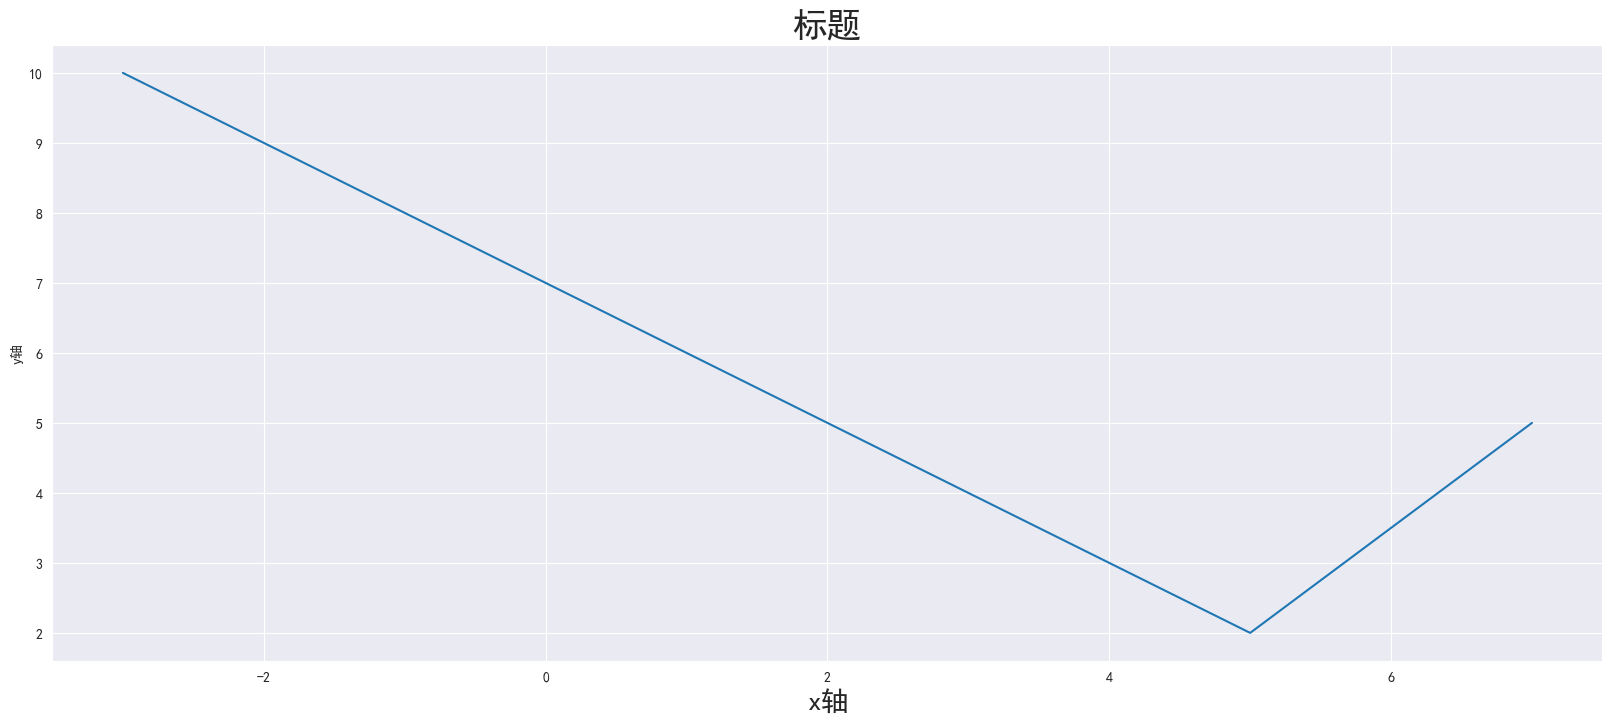

In [17]:
x = [-3, 5, 7]
y = [10, 2, 5]
plt.figure(figsize=(20, 8))
plt.plot(x, y)
plt.xlabel('x轴', fontsize=20)
plt.ylabel('y轴', fontsize=10)
plt.title('标题', fontsize=25)
plt.show()

#### 2-1、数据可视化案例

In [18]:
anscombe = pd.read_csv('./data/anscombe.csv')

In [19]:
anscombe.groupby('dataset').describe().T

dataset          I         II        III         IV
x count  11.000000  11.000000  11.000000  11.000000
  mean    9.000000   9.000000   9.000000   9.000000
  std     3.316625   3.316625   3.316625   3.316625
  min     4.000000   4.000000   4.000000   8.000000
  25%     6.500000   6.500000   6.500000   8.000000
  50%     9.000000   9.000000   9.000000   8.000000
  75%    11.500000  11.500000  11.500000   8.000000
  max    14.000000  14.000000  14.000000  19.000000
y count  11.000000  11.000000  11.000000  11.000000
  mean    7.500909   7.500909   7.500000   7.500909
  std     2.031568   2.031657   2.030424   2.030579
  min     4.260000   3.100000   5.390000   5.250000
  25%     6.315000   6.695000   6.250000   6.170000
  50%     7.580000   8.140000   7.110000   7.040000
  75%     8.570000   8.950000   7.980000   8.190000
  max    10.840000   9.260000  12.740000  12.500000

In [20]:
# 由大致描述可见，分组的几分数据应该一致，那是这样么？

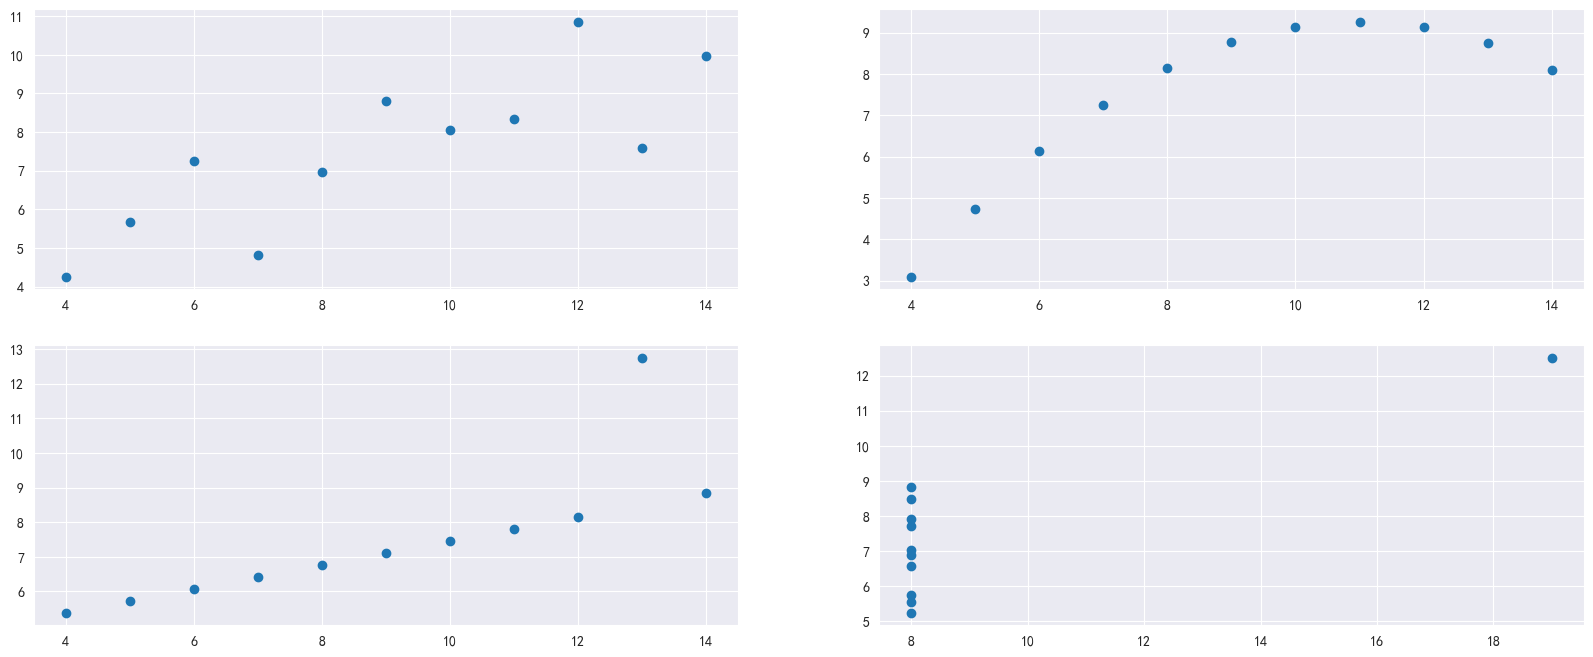

In [21]:
# 创建四个坐标系
fig = plt.figure(figsize=(20, 8))
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

# 绘制四组数据
ax1.scatter(anscombe[anscombe['dataset'] == 'I']['x'], anscombe[anscombe['dataset'] == 'I']['y'])
ax2.scatter(anscombe[anscombe['dataset'] == 'II']['x'], anscombe[anscombe['dataset'] == 'II']['y'])
ax3.scatter(anscombe[anscombe['dataset'] == 'III']['x'], anscombe[anscombe['dataset'] == 'III']['y'])
ax4.scatter(anscombe[anscombe['dataset'] == 'IV']['x'], anscombe[anscombe['dataset'] == 'IV']['y'])

plt.show()

**发现四组数据完全不同，所以单靠describe，可能会出现数据误差，而图形化能更直观的体现数据分布**

#### 2-2、单变量可视化方式：一般使用直方图hist

In [22]:
tips = pd.read_csv('./data/tips.csv')

In [23]:
pd.qcut(tips['total_bill'], 10)

0      (16.222, 17.795]
1        (3.069, 10.34]
2      (19.818, 22.508]
3      (22.508, 26.098]
4      (22.508, 26.098]
             ...       
239    (26.098, 32.235]
240    (26.098, 32.235]
241    (22.508, 26.098]
242    (17.795, 19.818]
243    (17.795, 19.818]
Name: total_bill, Length: 244, dtype: category
Categories (10, interval[float64, right]): [(3.069, 10.34] < (10.34, 12.636] < (12.636, 14.249] < (14.249, 16.222] ... (19.818, 22.508] < (22.508, 26.098] < (26.098, 32.235] < (32.235, 50.81]]

In [24]:
tips['total_bill'].describe()

count    244.000000
mean      19.785943
std        8.902412
min        3.070000
25%       13.347500
50%       17.795000
75%       24.127500
max       50.810000
Name: total_bill, dtype: float64

In [25]:
points = np.linspace(3.07, 50.810, 11)

(array([ 7., 42., 68., 51., 31., 19., 12.,  7.,  3.,  4.]),
 array([ 3.07 ,  7.844, 12.618, 17.392, 22.166, 26.94 , 31.714, 36.488,
        41.262, 46.036, 50.81 ]),
 <BarContainer object of 10 artists>)

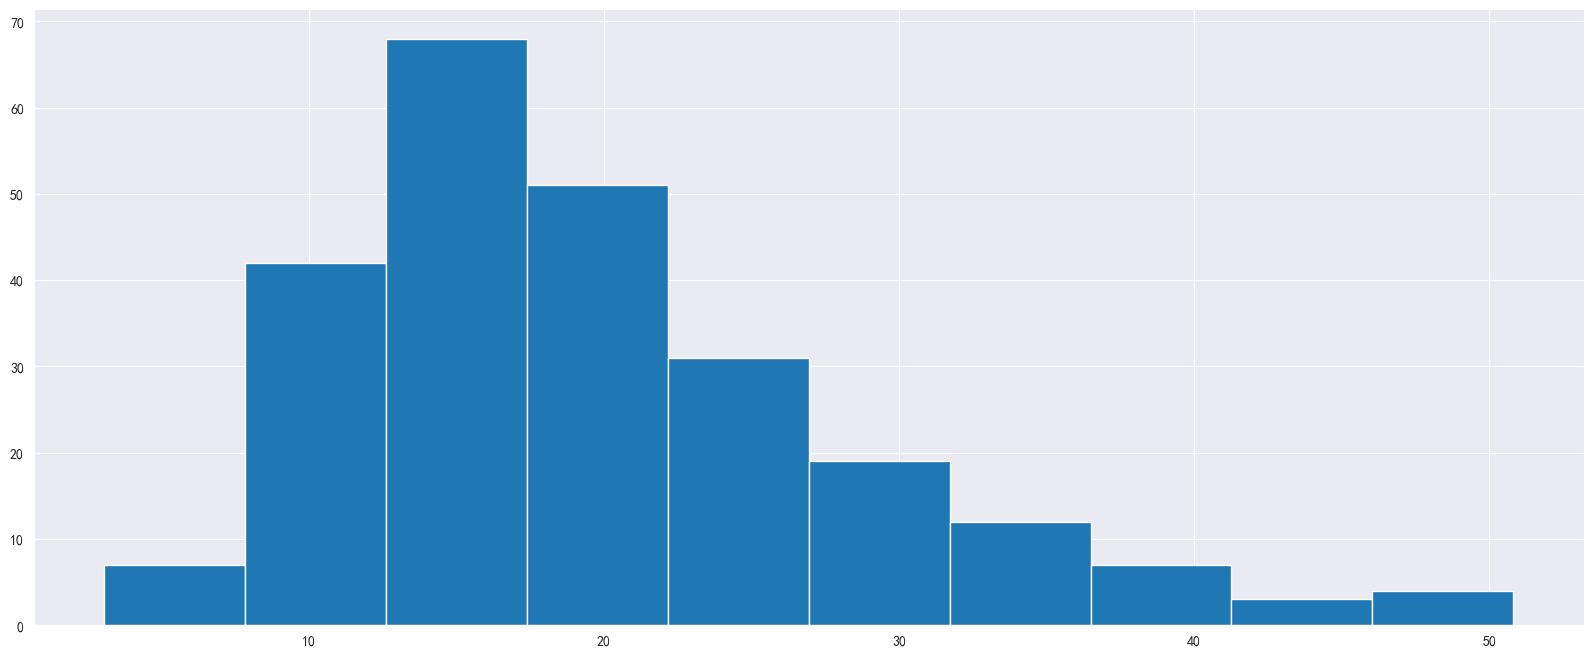

In [26]:
plt.figure(figsize=(20, 8))
plt.hist(tips['total_bill'], bins=10)


#### 2-3、双变量可视化方式：一般使用散点图scatter

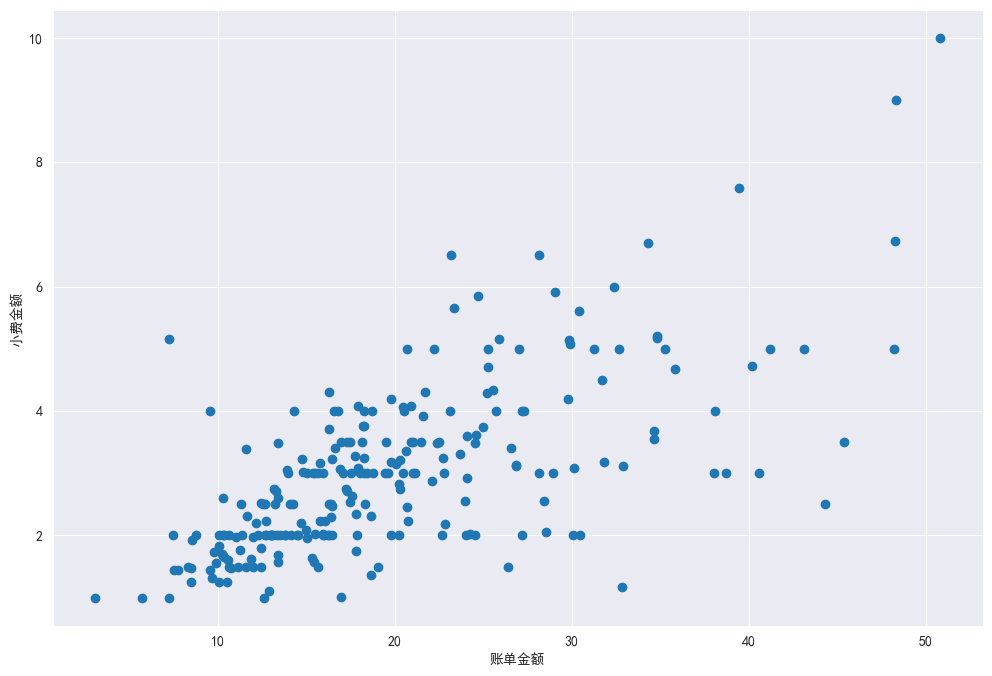

In [27]:
plt.figure(figsize=(12, 8))
plt.scatter(tips['total_bill'], tips['tip'])
plt.xlabel('账单金额')
plt.ylabel('小费金额')
plt.grid(True)
plt.show()

#### 2-4、多变量可视化方式： 一般使用散点图scatter, 可以使用散点图标记颜色, 改变大小区分

In [28]:
tips['sex_color'] = tips['sex'].apply(lambda x: 'r' if x == 'Female' else 'b')
tips.head()

,total_bill,tip,sex,smoker,day,time,size,sex_color
0,16.99,1.01,Female,No,Sun,Dinner,2,r
1,10.34,1.66,Male,No,Sun,Dinner,3,b
2,21.01,3.50,Male,No,Sun,Dinner,3,b
3,23.68,3.31,Male,No,Sun,Dinner,2,b
4,24.59,3.61,Female,No,Sun,Dinner,4,r


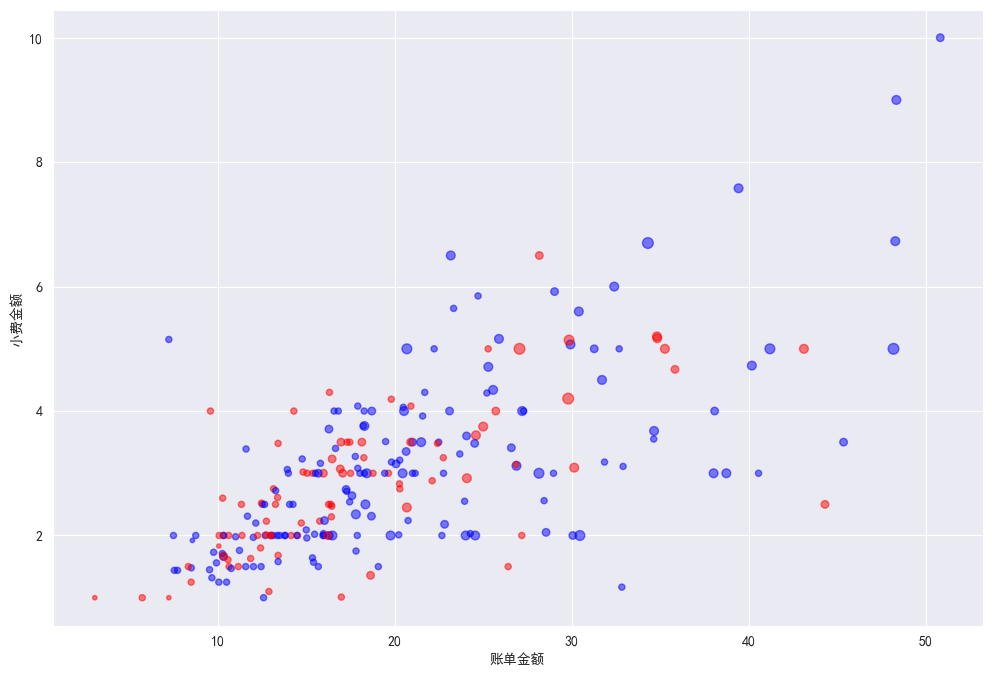

In [29]:
plt.figure(figsize=(12, 8))
plt.scatter(x=tips['total_bill'], y=tips['tip'], c=tips['sex_color'], s=tips['size'] * 10, alpha=0.5)
plt.xlabel('账单金额')
plt.ylabel('小费金额')
plt.grid(True)
plt.show()

### 3、Pandas 绘图 pandas是基于matplotlib的封装

#### 3-1、单变量可视化

In [32]:
winemag = pd.read_csv('./data/winemag-data_first150k.csv', index_col=0)
winemag.head()

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


##### 3-1-1、柱状图plot.bar： 

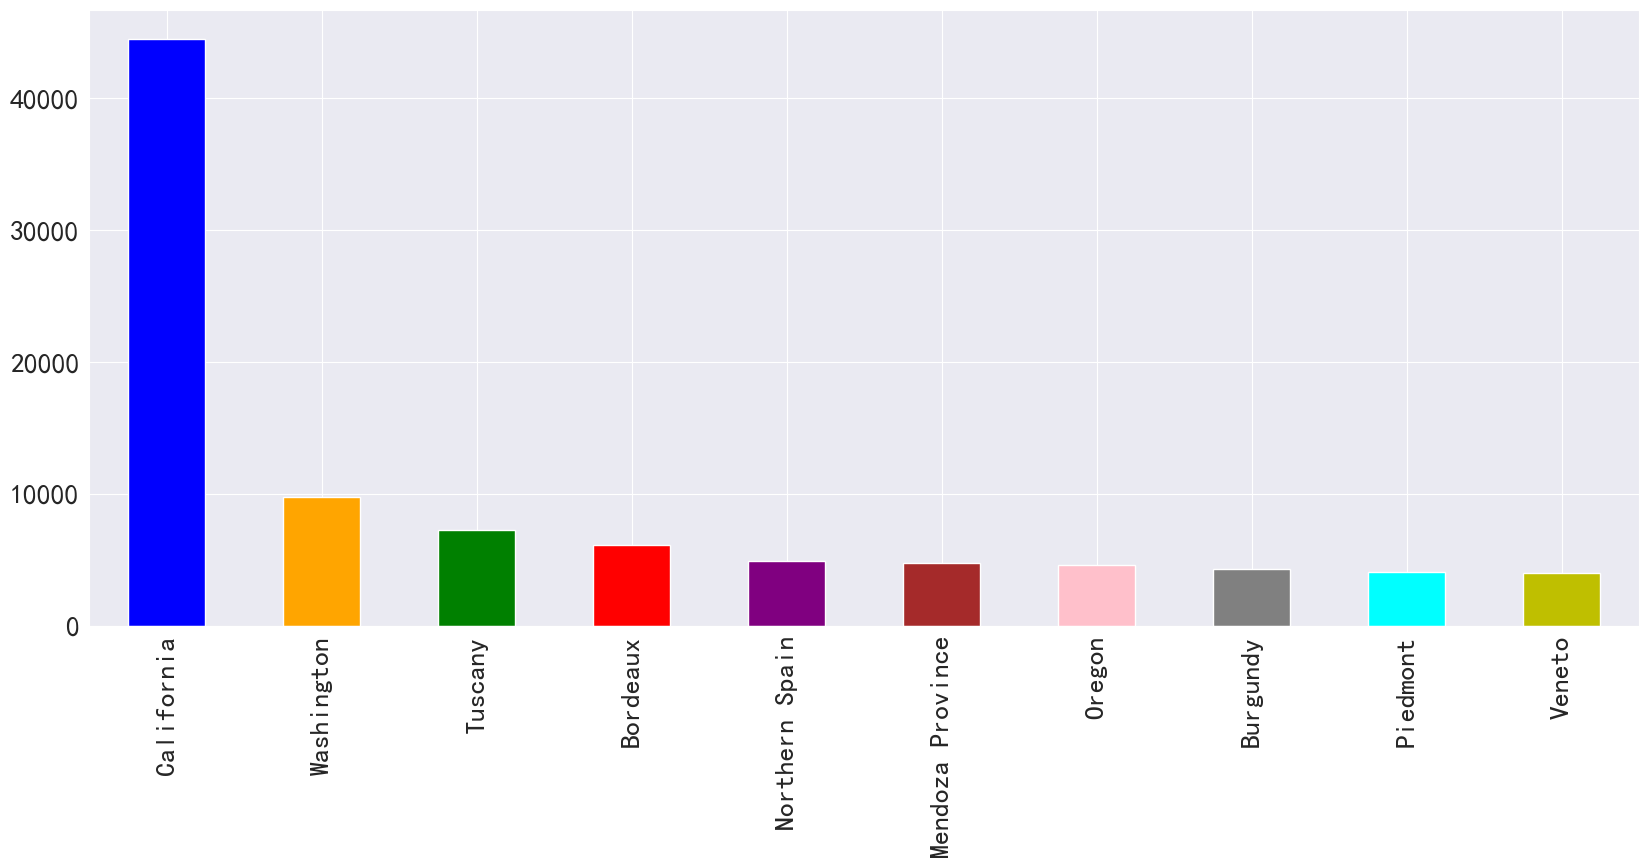

In [34]:
# 绘制产地前10的产量
winemag['province'].value_counts().head(10).plot.bar(figsize=(20, 8), fontsize=20, color=['b', 'orange', 'g', 'r', 'purple', 'brown', 'pink', 'gray', 'cyan', 'y'])
plt.show()

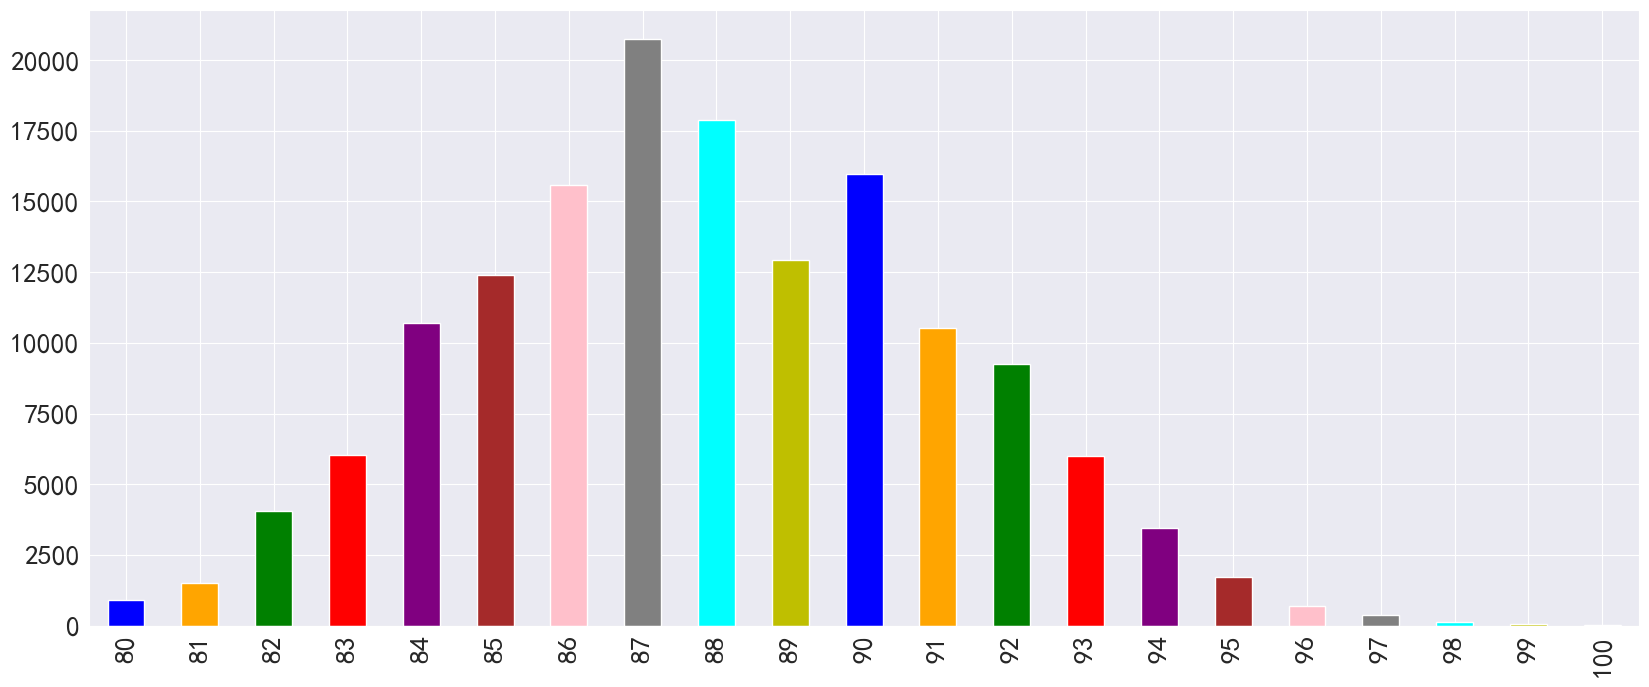

In [35]:
text_kwargs = dict(figsize=(20, 8), fontsize=20, color=['b', 'orange', 'g', 'r', 'purple', 'brown', 'pink', 'gray', 'cyan', 'y'])
winemag['points'].value_counts().sort_index().plot.bar(**text_kwargs)
plt.show()

##### 3-1-2、折线图plot.line

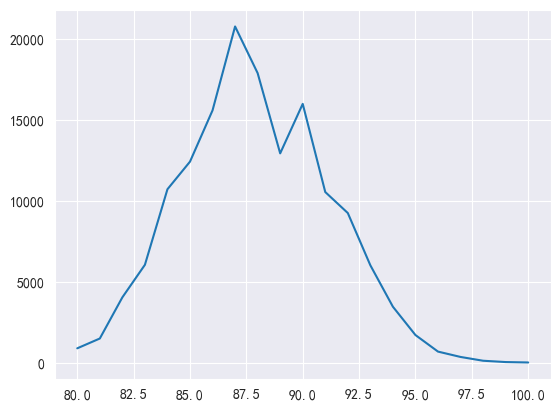

In [36]:
winemag['points'].value_counts().sort_index().plot.line()
plt.show()

##### 3-1-3、面积图plot.area  填充折线下方区域

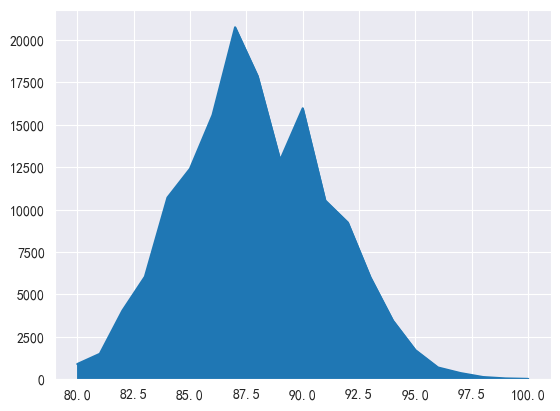

In [37]:
winemag['points'].value_counts().sort_index().plot.area()
plt.show()

##### 3-1-4、直方图plot.hist：看数据分布
- 如果绘制直方图时，出现极值，由于极值的存在，导致直方图比例失衡，无法观察大多数数据的分布状态，可以取出极值单独处理

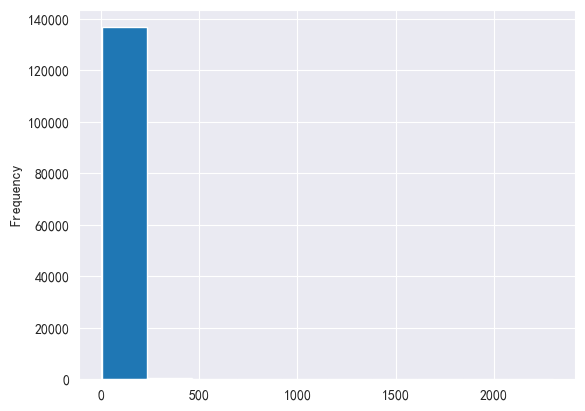

In [39]:
winemag['price'].plot.hist()
plt.show()

In [40]:
# 发现，数据展示无法观察分布状态
winemag.describe()

,points,price
count,150930.000000,137235.000000
mean,87.888418,33.131482
std,3.222392,36.322536
min,80.000000,4.000000
25%,86.000000,16.000000
50%,88.000000,24.000000
75%,90.000000,40.000000
max,100.000000,2300.000000


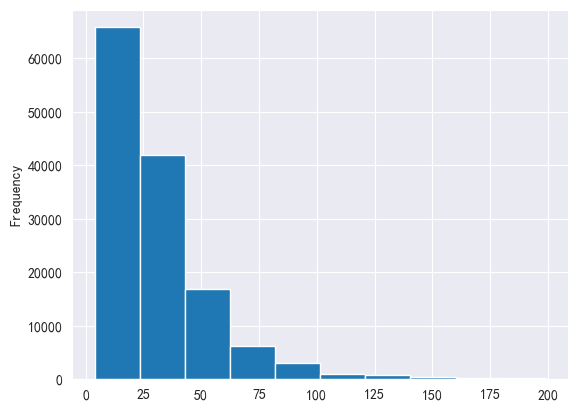

In [43]:
# 可见数据至少75%，处于40元一下，但最高值为2300，此极值导致无法正常展示分布
winemag['price'][winemag['price'] < 200].plot.hist()
plt.show()

##### 3-1-4、饼图plot.pie: 类别相对较少，所有类别和为1，一般用来看比例

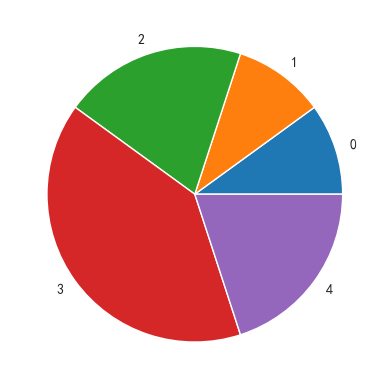

In [46]:
s_d = pd.Series([1, 1, 2, 4, 2])
s_d.plot.pie()
plt.show()